# Classical approaches

The aim of this notebook is to explain how to use various classical models for approximating solutions to linear equations. The library implements the following methods:

- Gauss-Seidel
- Richardson Iteration
- Jacobi
- Successive Over-Relaxation (SOR)
- Accelerated Over-Relaxation (AOR)
- SOR with Chebyshev acceleration
- AOR with Chebyshev acceleration


For more details about these approaches, see the [documentation](https://Salahberra2022.github.io/deep_unfolding/).

## Start of the notebook

We import from `deep_unfolding` all models we want to compare, the device where the code will execute (CPU or GPU), and the `gen_linear_()` function to generate a random matrix to build a $Ax=b$ system.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from deep_unfolding import (
    gen_linear, GaussSeidel, Richardson, Jacobi, SOR, SORCheby, AOR, AORCheby
)

## Setting up the problem

In this example, we randomly generate a $H$ matrix and define:

- `n` : Number of rows
- `m` : Number of columns

We also define the number of iterations we want to have for our algorithms to converge towards a solution, as well as `bs`, the batch size (number of samples we use), which will be used to generate the solution to the problem.

In [3]:
# Model parameters and Parameters for evaluation of generalization error
total_itr = 25  # Total number of iterations
n = 150  # Size of matrix (rows)
m = 450  # Size of matrix (columns)
bs = 10  # Number of samples
seed = 12

# Generate A and H
A, H, W, solution, y = gen_linear(n, m, seed, bs)

## Models

First, it's necessary to instantiate the models we want to test and/or compare:

In [4]:
gs_model = GaussSeidel(n, A, H, bs, y)
ri_model = Richardson(n, A, H, bs, y)
jac_model = Jacobi(n, A, H, bs, y, omega=0.2)
sor_model = SOR(n, A, H, bs, y, omega=1.8)
sorcheb_model = SORCheby(n, A, H, bs, y, omega=1.8, omegaa=1.8, gamma=0.8)
aor_model = AOR(n, A, H, bs, y, omega=0.3, r=0.2)
aorcheb_model = AORCheby(n, A, H, bs, y, omega=0.1, r=0.1)

Then, we test the created models on our problem and evaluate their performances at different number of iterations (1 to `total_itr`). This evaluation is made using MSE metrics:

In [5]:
gs_model.solve(total_itr)
ri_model.solve(total_itr)
jac_model.solve(total_itr)
sor_model.solve(total_itr)
sorcheb_model.solve(total_itr)
aor_model.solve(total_itr)
aorcheb_model.solve(total_itr)

pass

In [7]:
gs_norm = gs_model.evaluate_all(solution)
ri_norm = ri_model.evaluate_all(solution)
jac_norm = jac_model.evaluate_all(solution)
sor_norm = sor_model.evaluate_all(solution)
sorcheb_norm = sorcheb_model.evaluate_all(solution)
aor_norm = aor_model.evaluate_all(solution)
aorcheb_norm = aorcheb_model.evaluate_all(solution)

## Performance visualization

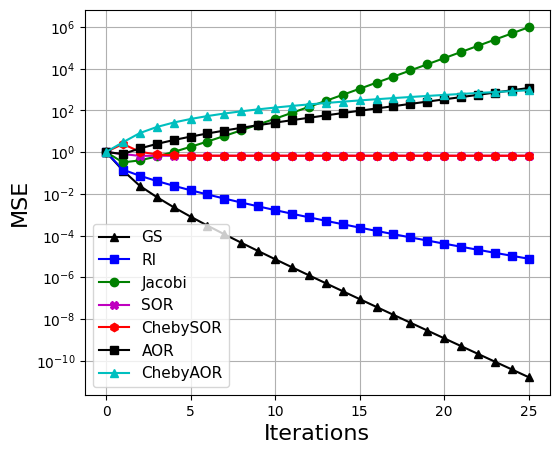

In [9]:
methods = ["GS", "RI", "Jacobi", "SOR", "ChebySOR", "AOR", "ChebyAOR"]
markers = ['^k-', 'sb-', 'og-', 'Xm-', 'hr-', 'sk-', '^c-'] #, 'sr-', '^r:', '^b:', 'ok:', 'sg:', '^y:']
norms = [gs_norm, ri_norm, jac_norm, sor_norm, sorcheb_norm, aor_norm, aorcheb_norm]

itr_list = np.arange(total_itr + 1)
plt.figure(figsize=(6,5))
for method, marker, norm in zip(methods, markers, norms):
    plt.semilogy(itr_list, norm, marker, label=method)
    plt.grid("True")
plt.legend(fontsize=11)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.yscale('log')
plt.show()
